In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [3]:
datatrain = pd.read_csv('dataset/datatrain.csv')
datatest = pd.read_csv('dataset/datatest.csv')



In [4]:
datatrain = datatrain[['age','su','pot','appet','htn','dm','cad','pe','classification']]

In [5]:
datatrain.columns = ['age','sugar','potassium','appetite','hypertension','diabetes_mellitus','coronary_artery_disease','peda_edema', 'class']
datatest.columns = ['age','sugar','potassium','appetite','hypertension','diabetes_mellitus','coronary_artery_disease','peda_edema', 'class']

ValueError: Length mismatch: Expected axis has 43 elements, new values have 9 elements

In [ ]:
datatrain.head()


,age,sugar,potassium,appetite,hypertension,diabetes_mellitus,coronary_artery_disease,peda_edema,class
0,48.0,0.0,NaN,good,yes,yes,no,no,ckd
1,7.0,0.0,NaN,good,no,no,no,no,ckd
2,62.0,3.0,NaN,poor,no,yes,no,no,ckd
3,48.0,0.0,2.5,poor,yes,no,no,yes,ckd
4,51.0,0.0,NaN,good,no,no,no,no,ckd


In [ ]:
datatrain.isnull().sum()

age                         9
sugar                      49
potassium                  88
appetite                    1
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
peda_edema                  1
class                       0
dtype: int64

In [ ]:
datatest.isnull().sum()

age                        0
sugar                      0
potassium                  0
appetite                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
peda_edema                 0
class                      0
dtype: int64

In [ ]:
datatrain['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

datatrain['coronary_artery_disease'] = datatrain['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

datatrain['class'] = datatrain['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

datatrain['class'] = datatrain['class'].map({'ckd': 1, 'not ckd': 0})
datatrain['class'] = pd.to_numeric(datatrain['class'], errors='coerce')

cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {datatrain[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



In [ ]:
datatest['class'] = datatest['class'].map({'No_Disease': 0,'Low_Risk': 0 , 'Moderate_Risk': 1, 'High_Risk':1,'Severe_Disease':1})

In [ ]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   sugar                    351 non-null    float64
 2   potassium                312 non-null    float64
 3   appetite                 399 non-null    object 
 4   hypertension             398 non-null    object 
 5   diabetes_mellitus        398 non-null    object 
 6   coronary_artery_disease  398 non-null    object 
 7   peda_edema               399 non-null    object 
 8   class                    400 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 28.3+ KB


In [ ]:
cat_cols = [col for col in datatrain.columns if datatrain[col].dtype == 'object']
num_cols = [col for col in datatrain.columns if datatrain[col].dtype != 'object']

In [ ]:
def random_value_imputation(feature):
    random_sample = datatrain[feature].dropna().sample(datatrain[feature].isna().sum())
    random_sample.index = datatrain[datatrain[feature].isnull()].index
    datatrain.loc[datatrain[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = datatrain[feature].mode()[0]
    datatrain[feature] = datatrain[feature].fillna(mode)

In [ ]:
for col in num_cols:
    random_value_imputation(col)
for col in cat_cols:
    impute_mode(col)

In [ ]:
datatrain['hypertension'] = datatrain['hypertension'].map({'no': 0, 'yes': 1})
datatrain['hypertension'] = pd.to_numeric(datatrain['hypertension'], errors='coerce')
datatrain['diabetes_mellitus'] = datatrain['diabetes_mellitus'].map({'no': 0, 'yes': 1})
datatrain['diabetes_mellitus'] = pd.to_numeric(datatrain['diabetes_mellitus'], errors='coerce')
datatrain['coronary_artery_disease'] = datatrain['coronary_artery_disease'].map({'no': 0, 'yes': 1})
datatrain['coronary_artery_disease'] = pd.to_numeric(datatrain['coronary_artery_disease'], errors='coerce')
datatrain['appetite'] = datatrain['appetite'].map({'poor': 0, 'good': 1})
datatrain['appetite'] = pd.to_numeric(datatrain['appetite'], errors='coerce')
datatrain['peda_edema'] = datatrain['peda_edema'].map({'no': 0, 'yes': 1})
datatrain['peda_edema'] = pd.to_numeric(datatrain['peda_edema'], errors='coerce')

In [ ]:
datatrain.head()

,age,sugar,potassium,appetite,hypertension,diabetes_mellitus,coronary_artery_disease,peda_edema,class
0,48.0,0.0,4.2,1,1,1,0,0,1
1,7.0,0.0,4.2,1,0,0,0,0,1
2,62.0,3.0,5.0,0,0,1,0,0,1
3,48.0,0.0,2.5,0,1,0,0,1,1
4,51.0,0.0,4.1,1,0,0,0,0,1


In [ ]:
gula_mapping={
    0.0 : 10,
    1.0: 150,
    2.0: 500,
    3.0: 1000,
    4.0: 2000,
    5.0: 2500
}

datatrain['sugar'] = datatrain['sugar'].map(gula_mapping)

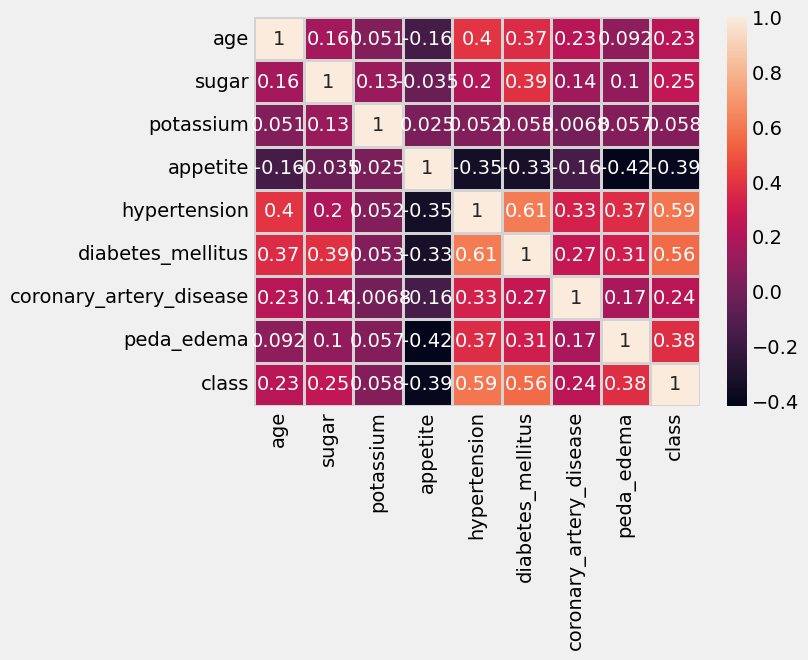

In [ ]:
sns.heatmap(datatrain.corr(), annot= True, linewidths= 2, linecolor= 'lightgrey')
plt.show()

In [ ]:
X_train = datatrain.drop(columns=['class'])
y_train = datatrain[['class']]
X_test = datatest.drop(columns=['class'])
y_test = datatest[['class']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

In [ ]:

import pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
